# Curved Regression $\,\, \tiny\text{Application Exercise Solution | Boeing (Aviation)}$
<img src="banner boeing.jpg" align=left>

<br>
### About the Business Situation & Data
___

Your company wants to buy a used Boeing 747.  This is the most popular airplane on the planet so many used 747s are available.  However, before you buy you want to understand how price varies with the total number of miles traveled.

The data here describe 288 recent sales of Boeing 747s. For each sale you have the transaction price (in millions $) and the total number of miles traveled at time of sale (in millions). 

This business application is based on assignments from Berkeley MBA200S and MBA296-31.

<br>
### Apparatus
___
Load function libraries, define additional useful functions, and set defaults here.

In [1]:
options(warn=-1)

# Load some required functions
library(rJava,      verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE)
library(xlsxjars,   verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE)
library(xlsx,       verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE) # Also, ensure Java version (32-bit or 64-bit) matches R kernellibrary(ggplot2, verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE)
library(ggplot2,    verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE)
  
# Define some visualization constants
restore = list(repr.plot.width=8, repr.plot.height=3)
PALETTE = c("#00A9FF", "#F8766D", "#7CAE00", "#C77CFF", "#CD9600", "#00BE67", "#FF61CC", "#00BFC4")

# Set some visualization formatting defaults
options(restore)
update_geom_defaults("point", list(size=0.5, colour=PALETTE[3]))
update_geom_defaults("line", list(size=0.15, colour=PALETTE[3]))
update_geom_defaults("bar", list(fill=PALETTE[3], colour=NA))
theme_update(plot.title=element_text(size=10, hjust=0.5), plot.subtitle=element_text(size=8, face="italic", hjust=0.5), axis.title=element_text(size=7), axis.text=element_text(size=7), strip.text=element_text(size=7), strip.text.y=element_text(angle=90), legend.title=element_blank(), legend.text=element_text(size=7))

<br>
### Retrieve Data
___

In [2]:
data = read.xlsx("../Data/DATASET_Airplane_Purchase.xlsx", sheetIndex=1, header=TRUE)
dim(data)
data

[1] 288   2

mileage,price
65.389641,58.75124
28.551241,162.87962
8.497678,309.67584
66.899765,64.57366
45.696991,84.77345
59.126179,71.24789
22.308903,151.94434
61.093033,84.55206
51.769249,86.76985
61.356056,94.46377


<br>
### Simple Regression Model
___

#### (a) Regress transaction prices on miles traveled. Construct the scatterplot with regression line. Label the units on both axes.

In [3]:
model = lm(price ~ mileage, data)
summary(model)


Call:
lm(formula = price ~ mileage, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-84.907 -23.608  -3.294  21.976 134.523 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 315.16141    4.13725   76.18   <2e-16 ***
mileage      -3.92252    0.09384  -41.80   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 34.96 on 286 degrees of freedom
Multiple R-squared:  0.8593,	Adjusted R-squared:  0.8589 
F-statistic:  1747 on 1 and 286 DF,  p-value: < 2.2e-16


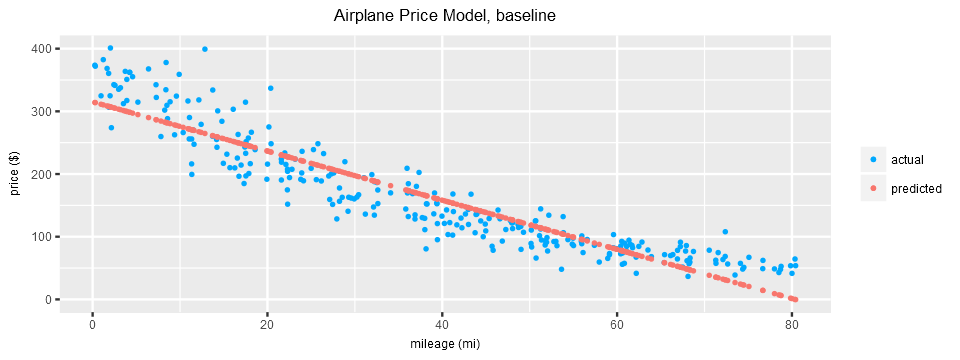

In [4]:
ggplot(data) +
geom_point(aes(x=mileage, y=price, color="actual")) +
geom_point(aes(x=mileage, y=predict(model), color="predicted")) +
scale_color_manual(values=c(actual=PALETTE[1], predicted=PALETTE[2])) +
ggtitle("Airplane Price Model, baseline") + xlab("mileage (mi)") + ylab("price ($)")

<br>
#### (b) What is $R^2$, standard deviation of the residuals, and slope coefficient for the model?

In [5]:
R2 = summary(model)$r.squared
se = summary(model)$sigma
c = model$coefficients["mileage"]

data.frame(R2, standard.deviation.of.residuals=se, coefficient.of.mileage=c)

,R2,standard.deviation.of.residuals,coefficient.of.mileage
mileage,0.8593451,34.95856,-3.92252


<br>
** (c) How do you interpret the intercept? **

The intercept is the predicted price (in \$ millions) for a new Boeing 747, i.e., with zero miles.  In this case, it is \$315 million.

<br>
#### (d) How do you interpret the slope?  Be sure to use correct units.

Each additional million miles reduces the predicted price by \$3.9 million.  Boeing 747s are flown an average of 1.75 million miles per year (3500 hours $\times$ 500 miles per hour), so they lose \$6.8 million in value per year.

<br>
#### (f) How is the fit of this regression model? Does the model tend to underpredict or overpredict prices for planes of particular mileages?

Not a great fit. The model tends to underpredict price for very low and very high mileage planes, and to overpredict prices in the middle.  This looks like the lower left quadrant of Tukey’s circle. Tukey doesn’t provide much information in this quadrant, saying both reciprocals and logs of either variable could help. It probably doesn’t make sense to think about reciprocals in this context, as neither 1/price nor 1/mileage make much sense, so the focus on log models in the following section makes sense.

<br>
### Curved Models
___

#### (a) Estimate three alternative models: (1) regress log price on mileage, (2) regress price on log mileage, and (3) regress log price on log mileage.  Examine the scatterplots with regression lines for all three models.  Hint: Be sure to use the natural log (i.e., `log`) rather than base 10 log (i.e., `log10`).

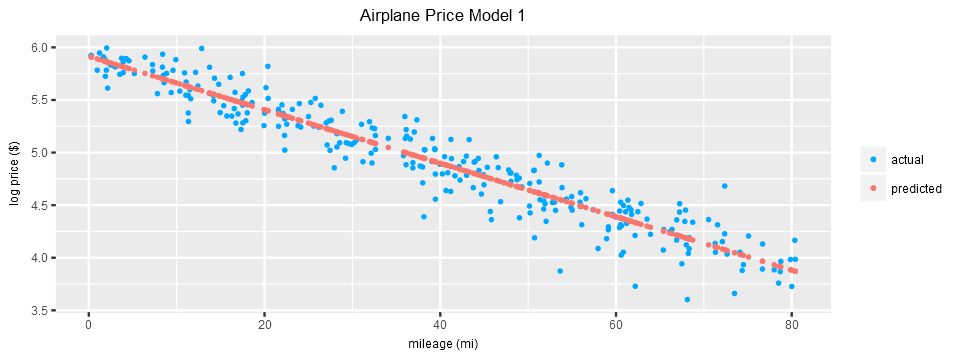

In [6]:
model1 = lm(log(price) ~ mileage, data)

ggplot(data) +
geom_point(aes(x=mileage, y=log(price), color="actual")) +
geom_point(aes(x=mileage, y=predict(model1), color="predicted")) +
scale_color_manual(values=c(actual=PALETTE[1], predicted=PALETTE[2])) +
ggtitle("Airplane Price Model 1") + xlab("mileage (mi)") + ylab("log price ($)")

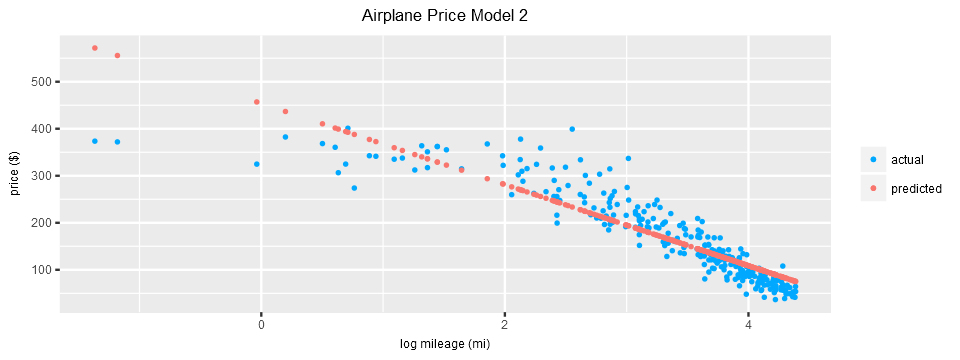

In [7]:
model2 = lm(price ~ log(mileage), data)

ggplot(data) +
geom_point(aes(x=log(mileage), y=price, color="actual")) +
geom_point(aes(x=log(mileage), y=predict(model2), color="predicted")) +
scale_color_manual(values=c(actual=PALETTE[1], predicted=PALETTE[2])) +
ggtitle("Airplane Price Model 2") + xlab("log mileage (mi)") + ylab("price ($)")

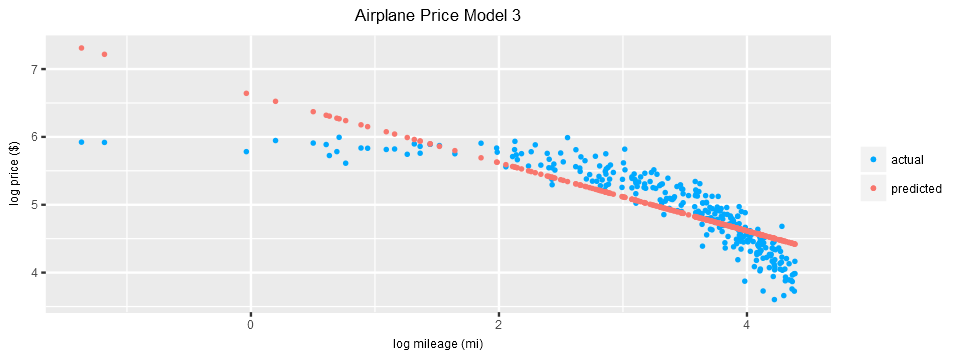

In [8]:
model3 = lm(log(price) ~ log(mileage), data)

ggplot(data) +
geom_point(aes(x=log(mileage), y=log(price), color="actual")) +
geom_point(aes(x=log(mileage), y=predict(model3), color="predicted")) +
scale_color_manual(values=c(actual=PALETTE[1], predicted=PALETTE[2])) +
ggtitle("Airplane Price Model 3") + xlab("log mileage (mi)") + ylab("log price ($)")

<br>
#### (b) Which model do you prefer?  Why?

Model 1 is the clear winner, it clearly fits best the curved pattern. The second and third models have curvature, but it don’t fit the scatterplot well.

<br>
#### (c) For your preferred model, what is $R^2$, standard deviation of the residuals, intercept, and slope coefficient on `mileage`?

In [9]:
R2 = summary(model1)$r.squared
se = summary(model1)$sigma
i = model1$coefficients["(Intercept)"]
c = model1$coefficients["mileage"]

data.frame(R2, standard.deviation.of.residuals=se, intercept=i, coefficient.of.mileage=c)

,R2,standard.deviation.of.residuals,intercept,coefficient.of.mileage
(Intercept),0.9123609,0.1734689,5.915149,-0.02540745


<br>
#### (d) How do you interpret the slope coefficient in your preferred model?

The slope coefficient is -0.0254. Thus, the predicted price decreases by 2.5% for every million miles that a plane travels. Boeing 747s are flown an average of 1.75 million miles per year (3500 hours $\times$ 500 miles per hour), so they lose 4.4% of their value each year.

<br>
#### (e) It is also valuable to transform the predictions from your preferred model back into the original units.

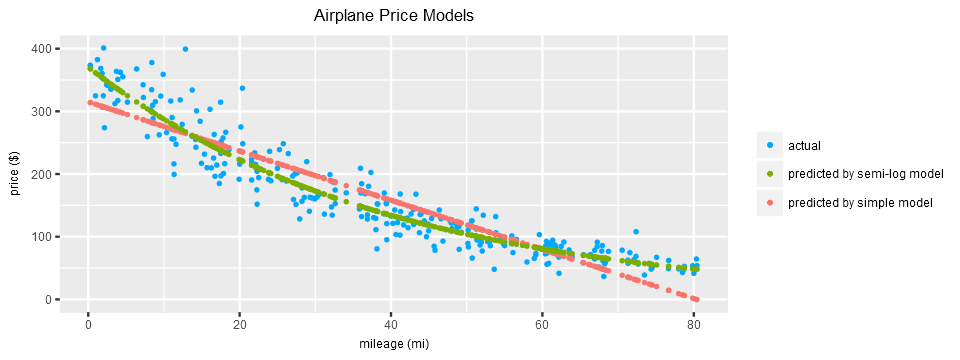

In [10]:
ggplot(data) +
geom_point(aes(x=mileage, y=price, color="actual")) +
geom_point(aes(x=mileage, y=predict(model), color="predicted by simple model")) +
geom_point(aes(x=mileage, y=exp(predict(model1)), color="predicted by semi-log model")) +
scale_color_manual(values=c("actual"=PALETTE[1], "predicted by simple model"=PALETTE[2], "predicted by semi-log model"=PALETTE[3])) +
ggtitle("Airplane Price Models") + xlab("mileage (mi)") + ylab("price ($)")

The semi-log model clearly fits much better.

$\tiny \text{Copyright (c) Berkeley Data Analytics Group, LLC}$